In [1]:
import pandas as pd

In [2]:
file_path = 'holders_count.csv'
df = pd.read_csv(file_path)

In [3]:
print(df.head())

   id        date ticker  holders_count  more_than_100  more_than_2500  \
0   1  2021-01-01    LTC          172.0           93.0            27.0   
1   2  2021-01-02    LTC          157.0           87.0            27.0   
2   3  2021-01-03    LTC          159.0           88.0            27.0   
3   4  2021-01-04    LTC          167.0           96.0            27.0   
4   5  2021-01-05    LTC          179.0          101.0            28.0   

   more_than_15000  open_price  high_price  low_price  close_price  
0             10.0      124.22      133.97     122.89       126.24  
1             10.0      126.20      142.00     123.15       136.96  
2             10.0      136.94      164.70     135.30       161.24  
3             12.0      161.23      173.66     139.31       155.34  
4             12.0      155.33      162.80     146.52       158.43  


In [4]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
                 id  holders_count  more_than_100  more_than_2500  \
count  24035.000000   2.266400e+04   22661.000000    22659.000000   
mean   12018.000000   1.019487e+05   48165.611623     8172.640893   
std     6938.451196   2.278206e+05  101277.117113    16877.009136   
min        1.000000   1.000000e+00       1.000000        1.000000   
25%     6009.500000   1.737800e+04    8351.000000     1240.000000   
50%    12018.000000   4.661900e+04   21644.000000     2906.000000   
75%    18026.500000   8.714800e+04   39813.000000     6925.000000   
max    24035.000000   1.365860e+06  825789.000000   300178.000000   

       more_than_15000    open_price    high_price     low_price   close_price  
count     22643.000000  24035.000000  24035.000000  24035.000000  24035.000000  
mean       2650.124498    963.021695   1010.407438    913.817828    962.324597  
std        8197.184198   4933.569005   5215.516944   4645.139967   4931.047850  
min           1.000000      0.00000

In [5]:
import matplotlib.pyplot as plt

<ipython-input-6-354b8b7e3626>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltc_df['date'] = pd.to_datetime(ltc_df['date'])


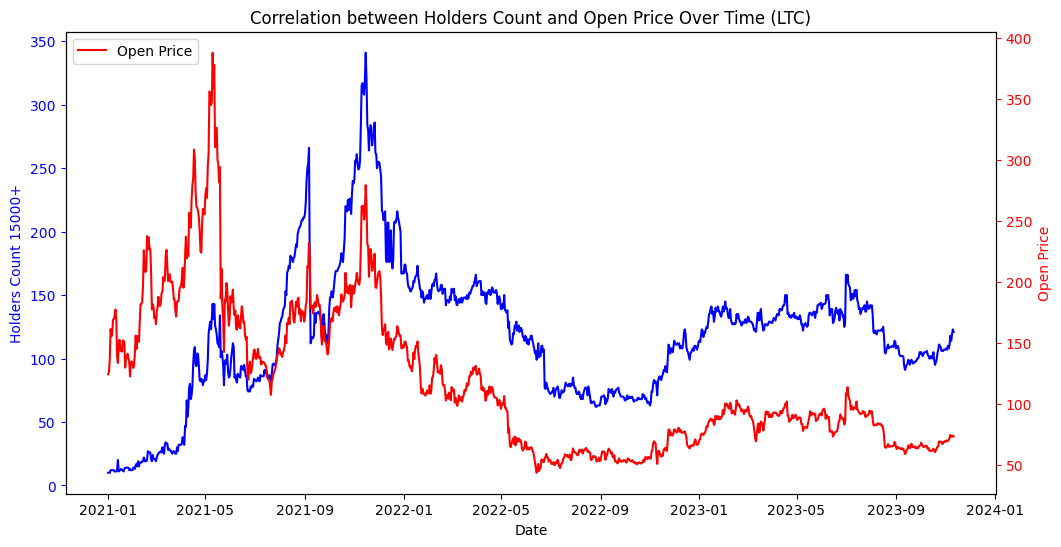

In [6]:
ltc_df = df[df['ticker'].str.contains('LTC')]

# Convert the 'date' column to datetime format
ltc_df['date'] = pd.to_datetime(ltc_df['date'])

# Sort the DataFrame by date
ltc_df = ltc_df.sort_values(by='date')

# Create a figure with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot holders_count on the primary y-axis as a line
ax1.plot(ltc_df['date'], ltc_df['more_than_15000'], label='Holders that have 15000_', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Holders Count 15000+', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis for open_price
ax2 = ax1.twinx()
ax2.plot(ltc_df['date'], ltc_df['open_price'], label='Open Price', color='r')
ax2.set_ylabel('Open Price', color='r')
ax2.tick_params('y', colors='r')

# Add title and legend
plt.title('Correlation between Holders Count and Open Price Over Time (LTC)')
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [7]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource, LinearAxis, Range1d

# Assuming you have a DataFrame named 'df'

# Filter rows where the 'ticker' column contains 'ATOM'
atom_df = df[df['ticker'].str.contains('ATOM')].copy()

# Convert 'date' column to datetime
atom_df['date'] = pd.to_datetime(atom_df['date'])

# Create a ColumnDataSource
source = ColumnDataSource(atom_df)

# Create a Bokeh figure
p = figure(x_axis_label='Date', y_axis_label='Holders Count', title='Correlation between Holders Count and Open Price Over Time (ATOM)')

# Plot the holders count on the primary y-axis
holders_count = p.line(x='date', y='holders_count', source=source, line_width=2, legend_label='Holders Count', color='blue')

# Create a secondary y-axis for open_price
p.extra_y_ranges = {"open_price_range": Range1d(start=atom_df['open_price'].min(), end=atom_df['open_price'].max())}
p.add_layout(LinearAxis(y_range_name="open_price_range", axis_label="Open Price"), 'right')
open_price = p.line(x='date', y='open_price', source=source, line_width=2, color='red', y_range_name="open_price_range", legend_label='Open Price')

# Create HoverTool for Holders Count
hover_holders_count = HoverTool()
hover_holders_count.renderers = [holders_count]
hover_holders_count.tooltips = [("Date", "@date{%F}"), ("Holders Count", "@holders_count")]
hover_holders_count.formatters = {"@date": "datetime"}

# Create HoverTool for Open Price
hover_open_price = HoverTool()
hover_open_price.renderers = [open_price]
hover_open_price.tooltips = [("Date", "@date{%F}"), ("Open Price", "@open_price")]
hover_open_price.formatters = {"@date": "datetime"}

# Attach the HoverTools to the figure
p.add_tools(hover_holders_count, hover_open_price)

# Show the plot
show(p)

<class 'ImportError'>: cannot import name 'window' from 'js' (unknown location)

<ipython-input-8-24962b956cbb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_inch_df['date'] = pd.to_datetime(one_inch_df['date'])


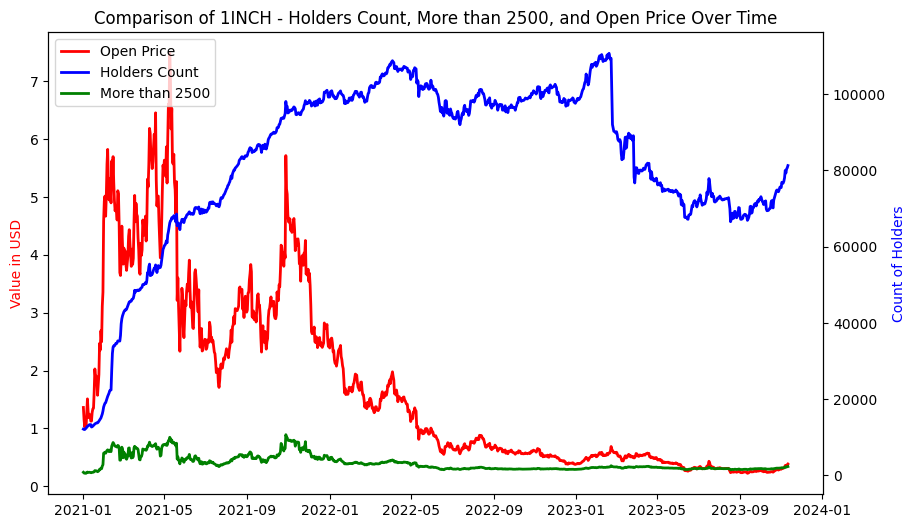

In [8]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the required data
ticker = '1INCH'

# Filter data for the specified ticker
one_inch_df = df[df['ticker'] == ticker]
one_inch_df['date'] = pd.to_datetime(one_inch_df['date'])

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot open_price on the left y-axis
ax1.plot(one_inch_df['date'], one_inch_df['open_price'], label='Open Price', color='red', linewidth=2)
ax1.set_ylabel('Value in USD', color='red')

# Create a second y-axis for holders_count and more_than_2500
ax2 = ax1.twinx()
ax2.plot(one_inch_df['date'], one_inch_df['holders_count'], label='Holders Count', color='blue', linewidth=2)
ax2.plot(one_inch_df['date'], one_inch_df['more_than_2500'], label='More than 2500', color='green', linewidth=2)
ax2.set_ylabel('Count of Holders', color='blue')

# Adjusting legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

# Adding title and labels
plt.title(f'Comparison of {ticker} - Holders Count, More than 2500, and Open Price Over Time')
plt.xlabel('Date')

# Show the plot
plt.show()
